<h1 style="color:red; font-family: 'Helvetica Neue', sans-serif; font-size:40px; text-align: center; font-weight:bold; font-style:italic">Amazon Reviews Sentiment - VADER & RoBERTa</h1>

<h1 style="font-family:verdana; color:#228B22; background-color:#FFFFE0;text-align: center;">Preface</h1>

In the bustling world of online shopping, customer reviews have become a powerful voice that shapes our purchasing decisions. Each day, millions of people flock to Amazon, the e-commerce giant, to explore an endless array of products and discover what others have to say about them. It is in this vast ocean of reviews that our project finds its purpose – to uncover the overall sentiment of Amazon customers through the analysis of their invaluable feedback.

With the goal of delving into the minds of consumers, we embarked on a journey through a massive dataset containing a plethora of Amazon reviews. Our mission was to extract insights, uncover patterns, and decipher the underlying sentiment that reverberates within these candid testimonials. We knew that behind each review lay a story, a personal experience, and an opinion waiting to be heard.

As we ventured into this project, we understood that sentiment analysis would be the key to unlocking the collective sentiment hidden within the sea of reviews. Armed with the power of Natural Language Processing and machine learning, we set out to analyze the text, decode emotions, and reveal the sentiment that influenced the customer's overall perception of the products they encountered.

Throughout our exploration, we encountered both challenges and triumphs. We meticulously examined the dataset, taking into account various factors such as ratings, review length, and the inherent positivity or negativity conveyed through the customers' words. We employed advanced techniques, leveraging state-of-the-art models like Roberta and Vader, to discern the sentiment expressed in each review. Our quest was to paint a comprehensive picture of the sentiments prevailing among the Amazon customer community.

Through the rich tapestry of reviews, we uncovered fascinating insights. We witnessed the sheer diversity of sentiments, ranging from exuberant praise to scathing criticism. We noticed the varying degrees of positivity, negativity, and neutrality that shaped the overall sentiment of the customers. We marveled at the power of language and its ability to influence perception and purchase decisions.

This project is an exploration, an ode to the voice of the customers who have left their mark on the digital landscape. It is a testament to the immense value of their opinions and the role they play in shaping the modern consumer landscape. As we present our findings and delve into the world of sentiments, I invite you to join me on this captivating journey through the realm of Amazon reviews. Together, let us unravel the sentiment that lies within the words and experiences of countless customers, and gain a deeper understanding of the sentiments that underpin the Amazon shopping experience.

<h1 style="font-family:verdana; color:#228B22; background-color:#FFFFE0;text-align: center;">Libraries</h1>

In [248]:
#basics
import pandas as pd
import numpy as np

#visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

#regular expression
import re
import string

#NLP toolkit
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

#VADER
from nltk.sentiment import SentimentIntensityAnalyzer

#RoBERTa
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from scipy.special import softmax

#other
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

<h1 style="font-family:verdana; color:#228B22; background-color:#FFFFE0;text-align: center;">Loading Datasets</h1>

In [2]:
data1=pd.read_csv('/kaggle/input/amazon-reviews/data1.csv')
data2=pd.read_csv('/kaggle/input/amazon-reviews/data2.csv')
data3=pd.read_csv('/kaggle/input/amazon-reviews/data3.csv')

In [3]:
data1.head(2)

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."


In [4]:
data2.head(2)

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.dateSeen,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-09-18T00:00:00Z,2017...",False,NaN,0,3,http://reviews.bestbuy.com/3545/5442403/review...,I thought it would be as big as small paper bu...,Too small,llyyue,https://www.newegg.com/Product/Product.aspx%25...
1,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...",True,NaN,0,5,http://reviews.bestbuy.com/3545/5442403/review...,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,Charmi,https://www.newegg.com/Product/Product.aspx%25...


In [5]:
data3.head(2)

,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,...,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",NaN,NaN,Cristina M,NaN,NaN,205 grams
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,Allow me to preface this with a little history...,One Simply Could Not Ask For More,NaN,NaN,Ricky,NaN,NaN,205 grams


<h1 style="font-family:verdana; color:#228B22; background-color:#FFFFE0;text-align: center;">Basic Checks</h1>

In [6]:
print('SHAPES')
print('data1', data1.shape)
print('======================')
print('data2', data2.shape)
print('======================')
print('data3', data3.shape)

SHAPES
data1 (28332, 24)
data2 (5000, 24)
data3 (1597, 27)


In this project, the aim is to find the sentiments of the customers towards the company based on the reviews provided by them. The project will not include any other form of anaylis based on given data in this project. 

So, we will look for only the relevant features from all the three datasets and make a separate combined dataset of all

In [7]:
print('COLUMNS:')
for data in [data1, data2, data3]:
    print(data.columns)
    print('======================================')

COLUMNS:
Index(['id', 'dateAdded', 'dateUpdated', 'name', 'asins', 'brand',
       'categories', 'primaryCategories', 'imageURLs', 'keys', 'manufacturer',
       'manufacturerNumber', 'reviews.date', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.username', 'sourceURLs'],
      dtype='object')
Index(['id', 'dateAdded', 'dateUpdated', 'name', 'asins', 'brand',
       'categories', 'primaryCategories', 'imageURLs', 'keys', 'manufacturer',
       'manufacturerNumber', 'reviews.date', 'reviews.dateAdded',
       'reviews.dateSeen', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.username', 'sourceURLs'],
      dtype='object')
Index(['id', 'asins', 'brand', 'categories', 'colors', 'dateAdded',
       'dateUpdated', 'dimension', 'e

In [8]:
#extracting common columns:

set(data1.columns).intersection(set(data2.columns)).intersection(set(data2.columns))

{'asins',
 'brand',
 'categories',
 'dateAdded',
 'dateUpdated',
 'id',
 'imageURLs',
 'keys',
 'manufacturer',
 'manufacturerNumber',
 'name',
 'primaryCategories',
 'reviews.date',
 'reviews.dateSeen',
 'reviews.doRecommend',
 'reviews.id',
 'reviews.numHelpful',
 'reviews.rating',
 'reviews.sourceURLs',
 'reviews.text',
 'reviews.title',
 'reviews.username',
 'sourceURLs'}

To fullfill the score of our project, we just need following columns:
- id
- reviews.date
- reviews.rating
- reviews.text
- reviews.title

In [9]:
reviews=pd.DataFrame()

for data in tqdm([data1, data2, data3]):
    df=data[['id', 'reviews.date', 'reviews.rating', 'reviews.text', 'reviews.title']]
    reviews=pd.concat([reviews, df], ignore_index=True)

100%|██████████| 3/3 [00:00<00:00, 222.79it/s]


In [10]:
reviews.columns=['id', 'date', 'rating', 'review', 'title']

In [11]:
reviews.head(3)

,id,date,rating,review,title
0,AVpgNzjwLJeJML43Kpxn,2017-03-02T00:00:00.000Z,3.0,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...
1,AVpgNzjwLJeJML43Kpxn,2016-08-31T00:00:00.000Z,4.0,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...
2,AVpgNzjwLJeJML43Kpxn,2016-12-06T00:00:00.000Z,5.0,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...


In [12]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34929 entries, 0 to 34928
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      34929 non-null  object 
 1   date    34549 non-null  object 
 2   rating  34509 non-null  float64
 3   review  34929 non-null  object 
 4   title   34899 non-null  object 
dtypes: float64(1), object(4)
memory usage: 1.3+ MB


- There are total 34929 reviews for products
- Only rating in numeric column
- There are missing values in the dataset

In [13]:
reviews.describe()

,rating
count,34509.000000
mean,4.520763
std,0.912454
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


- The average rating is approximately 4.52, which suggests that, on average, customers are generally positive about the products being reviewed.
- The standard deviation of 0.912454 indicates a moderate degree of variation in the ratings. This means that there is some diversity in customer opinions, with some ratings deviating from the mean.
- The minimum rating is 1, while the maximum rating is 5. This indicates that the dataset includes the full range of possible ratings, allowing for a comprehensive analysis of sentiment.
- Overall, these observations indicate that the dataset predominantly consists of positive reviews, as indicated by the high mean and median ratings. However, the presence of a standard deviation and the range of ratings suggest that there is still some variation in customer sentiment, allowing for a more nuanced analysis of the reviews.

In [14]:
reviews.isna().mean()

id        0.000000
date      0.010879
rating    0.012024
review    0.000000
title     0.000859
dtype: float64

We would prefer to have maximum reviews so that the model will be well-trained to carry out sentiment analysis. Review column has no missing value. But there are 30 titles missing for reviews. Additionally, around 10% values are missing from data column whereas 12% reviews have no information available for ratings

We would be losing out on data if we drop any rows or column. But for some analysis, missing values might give us trouble. 

We can go for a simple solution. Create a relica of dataset and drop all missing values in it

In [15]:
no_missing_reviews=reviews.copy()

In [16]:
no_missing_reviews.dropna(subset=['rating'], inplace=True)

Thus, all the missing values are handled.

<h1 style="font-family:verdana; color:#228B22; background-color:#FFFFE0;text-align: center;">Exploratory Data Analysis</h1>

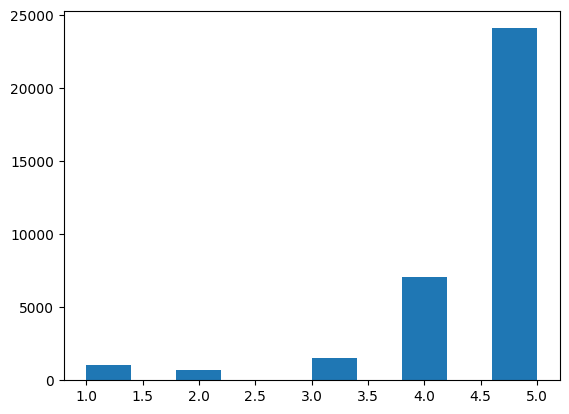

In [17]:
plt.hist(x='rating', data=no_missing_reviews);

Since the values are discrete, the histogram acts as countplot. 
- The majority of the reviews (24,116) have a rating of 5. This indicates a strong positive sentiment among customers, as the highest rating is the most prevalent in the dataset. This sounds like good news for the company.
- When considering ratings of 4 and 5 combined, there are a total of 31,208 reviews. This indicates that approximately 90% of the reviews in the dataset are positive, as they fall into the higher rating range.
- Combining ratings of 1, 2, and 3, there are a total of 3,301 reviews that fall into this category. Analyzing these reviews can provide insights into potential areas of improvement or specific issues that customers encountered.

These observations highlight the overall positive sentiment among customers, but also indicate the presence of moderate and negative reviews. Analyzing the content and sentiments of these reviews can provide valuable insights for improving products, addressing customer concerns, and enhancing the overall customer experience.

In [19]:
no_missing_reviews.head(3)

,id,date,rating,review,title
0,AVpgNzjwLJeJML43Kpxn,2017-03-02T00:00:00.000Z,3.0,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...
1,AVpgNzjwLJeJML43Kpxn,2016-08-31T00:00:00.000Z,4.0,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...
2,AVpgNzjwLJeJML43Kpxn,2016-12-06T00:00:00.000Z,5.0,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...


In [20]:
#number of characters, words and sentences in each review
no_missing_reviews['characters']= no_missing_reviews['review'].apply(len)
no_missing_reviews['words']=no_missing_reviews['review'].apply(lambda x: len(nltk.word_tokenize(x)))
no_missing_reviews['sentences']=no_missing_reviews['review'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [23]:
no_missing_reviews.head(3)

,id,date,rating,review,title,characters,words,sentences
0,AVpgNzjwLJeJML43Kpxn,2017-03-02T00:00:00.000Z,3.0,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,139,33,2
1,AVpgNzjwLJeJML43Kpxn,2016-08-31T00:00:00.000Z,4.0,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,67,13,1
2,AVpgNzjwLJeJML43Kpxn,2016-12-06T00:00:00.000Z,5.0,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,56,13,1


In [24]:
no_missing_reviews[['characters', 'words', 'sentences']].describe()

,characters,words,sentences
count,34509.000000,34509.000000,34509.000000
mean,161.381031,34.373613,2.540613
std,330.563725,68.168787,2.803246
min,1.000000,1.000000,1.000000
25%,57.000000,12.000000,1.000000
50%,92.000000,20.000000,2.000000
75%,172.000000,37.000000,3.000000
max,19739.000000,4014.000000,125.000000


**Maximum Lengths:** The maximum values for the 'characters', 'words', and 'sentences' features are quite high, with the longest review having 19,739 characters, 4,017 words, and 125 sentences. These extremely long reviews could potentially contain detailed and extensive feedback or comments.

**Minimum Lengths:** The minimum values for all three features are 1, indicating the presence of extremely short reviews. These reviews might be very concise or could be outliers, possibly lacking substantial information or meaningful content.

**Average Lengths:** The mean values reveal the average length of reviews. On average, the reviews contain approximately 176 characters, 37 words, and 2.65 sentences. These averages can serve as baselines for understanding the typical length of reviews in the dataset.

**High Standard Deviations:** The standard deviations for the 'characters' and 'words' features are relatively high, indicating significant variation in the length of reviews. This suggests a wide range of review lengths, implying that some reviews are much longer or shorter than the average.''**

In [25]:
#review with one character
no_missing_reviews[no_missing_reviews['characters']==1]

,id,date,rating,review,title,characters,words,sentences
1674,AVpgNzjwLJeJML43Kpxn,2016-08-22T00:00:00.000Z,5.0,F,Five Stars,1,1,1
7590,AVpgNzjwLJeJML43Kpxn,2016-07-28T00:00:00.000Z,3.0,1,Three Stars,1,1,1
8381,AVpe7xlELJeJML43ypLz,2016-07-09T00:00:00.000Z,5.0,d,a,1,1,1


Single character reviews do not convey any meaning. Hence they will contribute much to out models. So lets drop these rows

In [26]:
no_missing_reviews.drop(index=no_missing_reviews[no_missing_reviews['characters']==1].index, inplace=True)

In [27]:
no_missing_reviews[no_missing_reviews['characters']==2].head()

,id,date,rating,review,title,characters,words,sentences
265,AVpgNzjwLJeJML43Kpxn,2015-11-30T00:00:00.000Z,4.0,OK,Amazon Batteries,2,1,1
1197,AVpgNzjwLJeJML43Kpxn,2017-04-11T00:00:00.000Z,5.0,:),Five Stars,2,2,1
1224,AVpgNzjwLJeJML43Kpxn,2017-08-01T00:00:00.000Z,5.0,A+,Five Stars,2,1,1
1225,AVpgNzjwLJeJML43Kpxn,2016-10-04T00:00:00.000Z,5.0,A+,Five Stars,2,1,1
1573,AVpgNzjwLJeJML43Kpxn,2017-08-21T00:00:00.000Z,5.0,Eh,Five Stars,2,1,1


We can still see there are some non-alphabet characters in the review. We will deal during the data cleaning

In [28]:
#review with one words
no_missing_reviews[no_missing_reviews['words']==1].head()

,id,date,rating,review,title,characters,words,sentences
55,AVpgNzjwLJeJML43Kpxn,2017-05-17T00:00:00.000Z,5.0,Excellent,5 Stars,9,1,1
265,AVpgNzjwLJeJML43Kpxn,2015-11-30T00:00:00.000Z,4.0,OK,Amazon Batteries,2,1,1
344,AVpgNzjwLJeJML43Kpxn,2017-01-26T00:00:00.000Z,5.0,AOK,AOK,3,1,1
399,AVpgNzjwLJeJML43Kpxn,2015-12-30T00:00:00.000Z,5.0,Awesome,awesome,7,1,1
479,AVpgNzjwLJeJML43Kpxn,2016-10-15T00:00:00.000Z,5.0,great,batteries,5,1,1


We want to know what are the text differentiator among reviews corresponding to high rating and comparatively lower ratings. We will create two categories, lets say, first group with product having ratings greater than 3 and other group with ratings less than or equal to 3

In [29]:
no_missing_reviews['rating_type']=no_missing_reviews['rating'].apply(lambda x: 'high' if x>3 else 'low')

In [30]:
# average characters, words, sentences count based on rating type
data1=pd.DataFrame(no_missing_reviews.groupby('rating_type')['characters'].mean())
data2=pd.DataFrame(no_missing_reviews.groupby('rating_type')['words'].mean())
data3=pd.DataFrame(no_missing_reviews.groupby('rating_type')['sentences'].mean())

data=pd.concat([data1, data2, data3], axis=1)
data

,characters,words,sentences
rating_type,,,
high,153.656348,32.768794,2.476447
low,234.574242,49.579697,3.148788


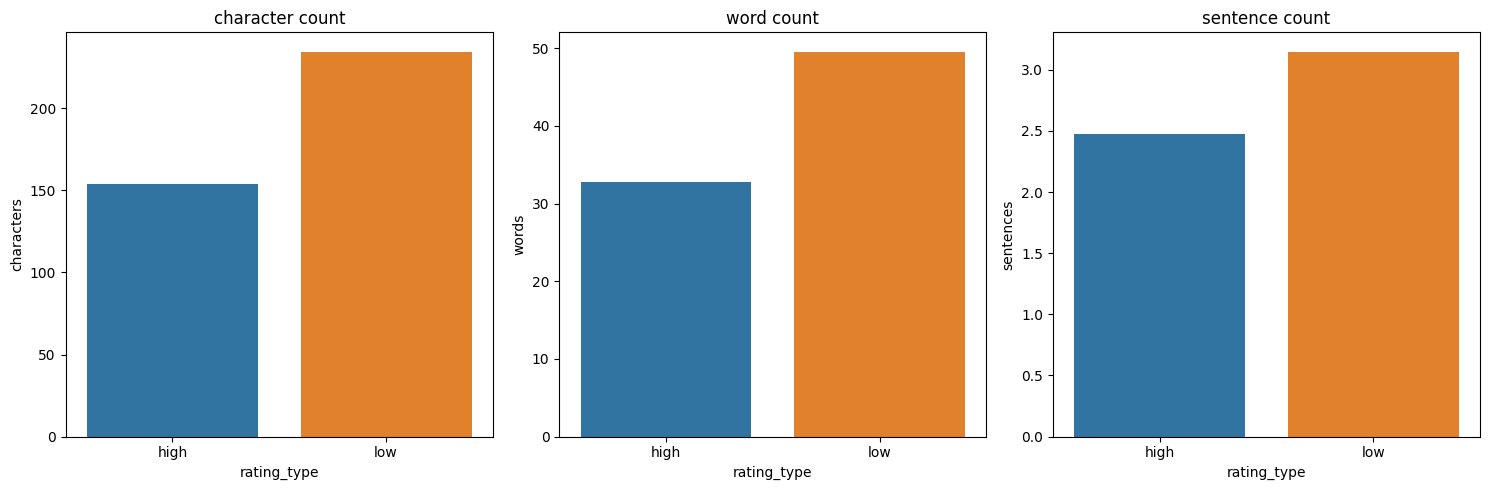

In [31]:
fig, ax=plt.subplots(1,3, figsize=(15,5))

sns.barplot(x=data.index, y='characters', data=data, ax=ax[0])
sns.barplot(x=data.index, y='words', data=data, ax=ax[1])
sns.barplot(x=data.index, y='sentences', data=data, ax=ax[2])

ax[0].set_title('character count')
ax[1].set_title('word count')
ax[2].set_title('sentence count')

plt.tight_layout();

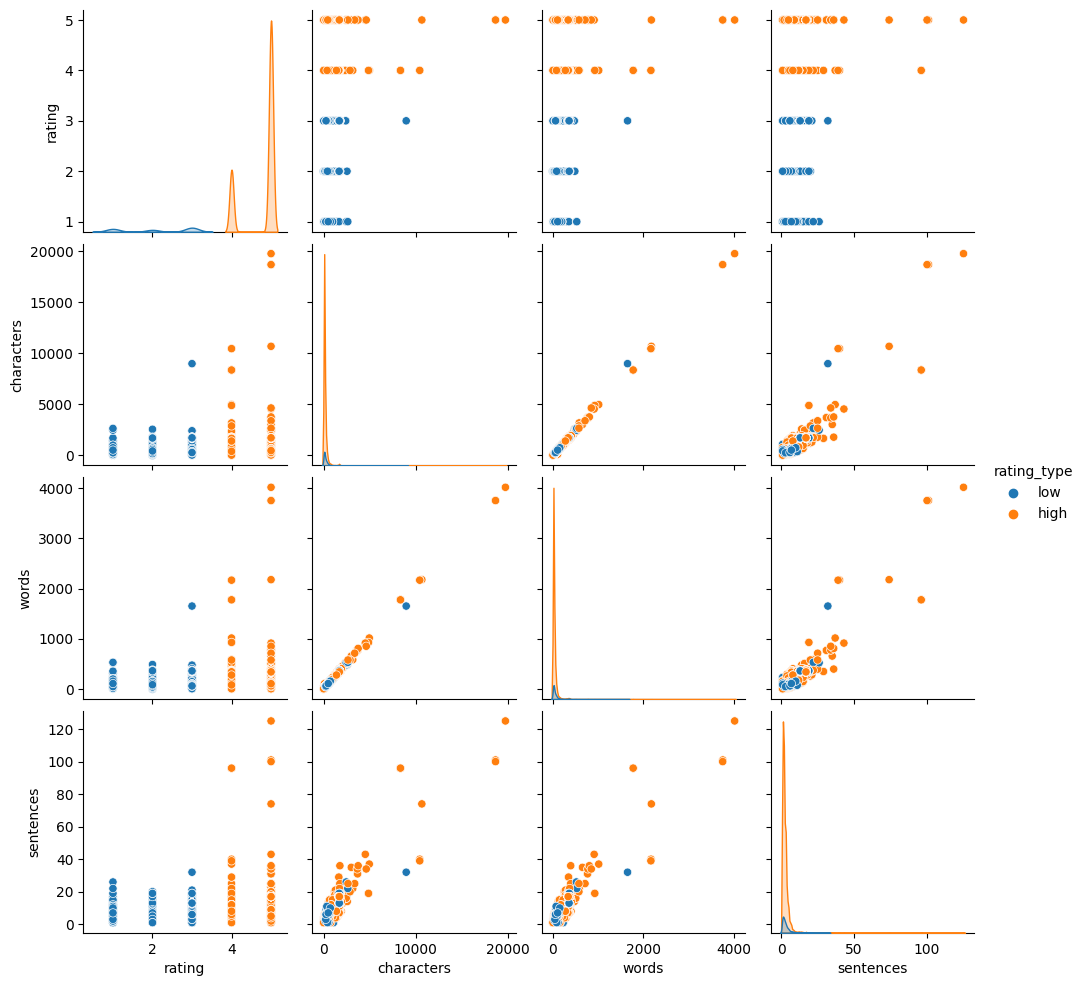

In [32]:
sns.pairplot(no_missing_reviews, hue='rating_type');

/tmp/ipykernel_34/1775008367.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=no_missing_reviews.corr()


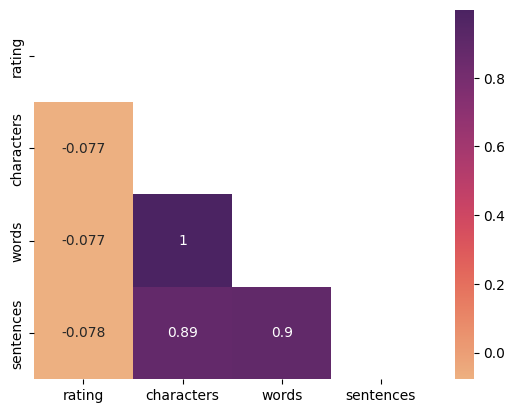

In [33]:
corr=no_missing_reviews.corr()
mask=np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, cmap='flare');

<h1 style="font-family:verdana; color:#228B22; background-color:#FFFFE0;text-align: center;">Data Processing</h1>

Data preprocessing is a crucial step in natural language processing (NLP) tasks, including sentiment analysis. It involves transforming raw text data into a format that is suitable for analysis and modeling. By applying various preprocessing techniques, we can clean and standardize the textual data, reducing noise and irrelevant information.

In the context of Amazon review sentiment analysis, data preprocessing plays a vital role in improving the accuracy and effectiveness of the analysis. The steps you mentioned are common techniques used in text preprocessing to enhance the quality of the data and extract meaningful features. Let's discuss each step in more detail:

**Remove punctuation:** Punctuation marks like commas, periods, or exclamation marks do not carry significant sentiment information and can be safely removed. This step helps in reducing the dimensionality of the data and simplifying the subsequent analysis.

**Lowercasing:** Converting all the text to lowercase ensures that the analysis treats words with the same spelling but different cases as the same. It helps in avoiding redundant duplicate features and improves the accuracy of downstream tasks such as sentiment analysis.

**Remove stop words:** Stop words are commonly used words that do not contribute much to the overall sentiment or meaning of the text, such as "a," "an," or "the." Removing these words helps to reduce noise and focus on the more important content-bearing words.

**Remove emojis:** Emojis are graphical representations used to express emotions. In sentiment analysis, they can add noise to the text and may not carry direct semantic meaning. Removing emojis helps to simplify the text and improve the interpretability of the sentiment analysis results.

**Tokenization:** Tokenization is the process of breaking down a text into individual tokens, such as words or subwords. It helps in preparing the text for further analysis and feature extraction.

**Stemming:** Stemming involves reducing words to their root or base form. For example, converting "running," "runs," and "ran" to the common stem "run." This step helps to normalize the words and reduce the dimensionality of the feature space.

By performing these preprocessing steps, we can clean the Amazon review data, standardize it, and remove noise and irrelevant information. This will provide a cleaner and more representative dataset for sentiment analysis, allowing for more accurate and insightful results.

In [35]:
#instantiating PorterSteemer object
ps=PorterStemmer()

In [36]:
def transform_text(text):

    #lower casing
    text=text.lower()

    #removing html tags
    pattern=re.compile('<.*?>')
    text=pattern.sub(r'', text)

    #removing urls
    pattern_url=re.compile(r'https?://\S+|www\.\S+')
    text=pattern_url.sub(r'', text)

    #removing punctuations
    for char in string.punctuation:   ###punctuation_marks '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
        text=text.replace(char, '')

    #tokenization
    text=nltk.word_tokenize(text)

    #removing stop words
    new_text=[]

    for word in text:
        if word not in stopwords.words('english'):
            new_text.append(word)

    #stemming
    new_text_stem=[]
    for word in new_text:
        word=ps.stem(word)
        new_text_stem.append(word)
   
    return ' '.join(new_text_stem)

In [37]:
reviews['transformed_review']=reviews['review'].apply(transform_text)

In [249]:
reviews.head(3)

,index,id,date,rating,review,title,transformed_review,rating_type
0,0,AVpgNzjwLJeJML43Kpxn,2017-03-02T00:00:00.000Z,3.0,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,order 3 one item bad qualiti miss backup sprin...,low
1,1,AVpgNzjwLJeJML43Kpxn,2016-08-31T00:00:00.000Z,4.0,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,bulk alway less expens way go product like,high
2,2,AVpgNzjwLJeJML43Kpxn,2016-12-06T00:00:00.000Z,5.0,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,well duracel price happi,high


In [39]:
#sample review
example=reviews['transformed_review'][np.random.randint(len(reviews))]
example

'tablet upgrad nabi jr 4 year old realli enjoy mani appsbooksvideo entertain much thing would recommend get addit storag product sinc isnt much intern'

In [40]:
ratings=[]
for i, row in reviews.iterrows():

    if i in no_missing_reviews.index:
        type=no_missing_reviews.loc[i, 'rating_type']
        ratings.append(type)

    else:
        ratings.append('NA')

In [41]:
reviews['rating_type']=ratings

In [250]:
reviews.head(3)

,index,id,date,rating,review,title,transformed_review,rating_type
0,0,AVpgNzjwLJeJML43Kpxn,2017-03-02T00:00:00.000Z,3.0,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,order 3 one item bad qualiti miss backup sprin...,low
1,1,AVpgNzjwLJeJML43Kpxn,2016-08-31T00:00:00.000Z,4.0,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,bulk alway less expens way go product like,high
2,2,AVpgNzjwLJeJML43Kpxn,2016-12-06T00:00:00.000Z,5.0,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,well duracel price happi,high


In [44]:
l= reviews[reviews['rating_type']=='high']['transformed_review'].tolist()

word_corpus_high=[]
for sent in l:
    for word in sent.split():
        word_corpus_high.append(word)

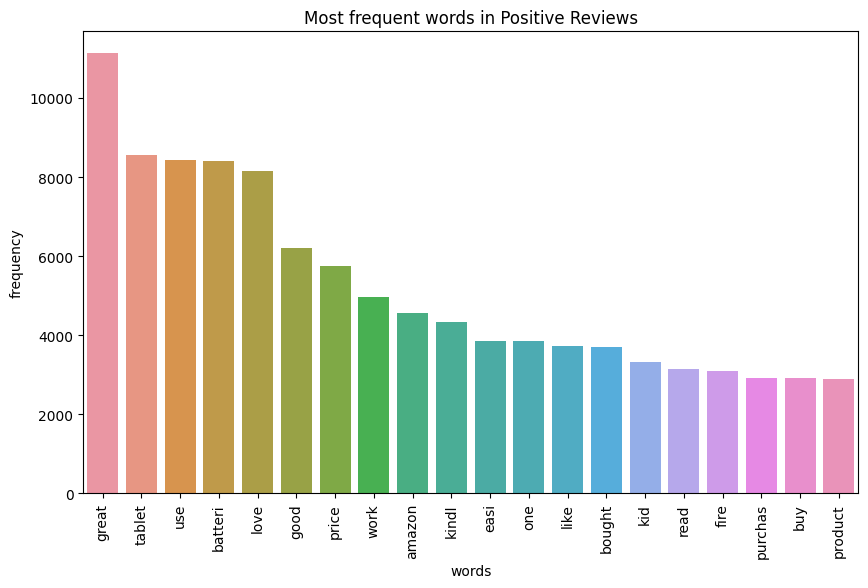

In [46]:
positves=pd.DataFrame(Counter(word_corpus_high).most_common(20))

plt.figure(figsize=(10,6))
sns.barplot(x=positves[0], y=positves[1])
plt.xticks(rotation=90)
plt.xlabel('words')
plt.ylabel('frequency')
plt.title('Most frequent words in Positive Reviews');

Words such as 'great', 'love', 'like' appear the most in positive reviews

In [47]:
l= reviews[reviews['rating_type']=='low']['transformed_review'].tolist()

word_corpus_low=[]
for sent in l:
    for word in sent.split():
        word_corpus_low.append(word)

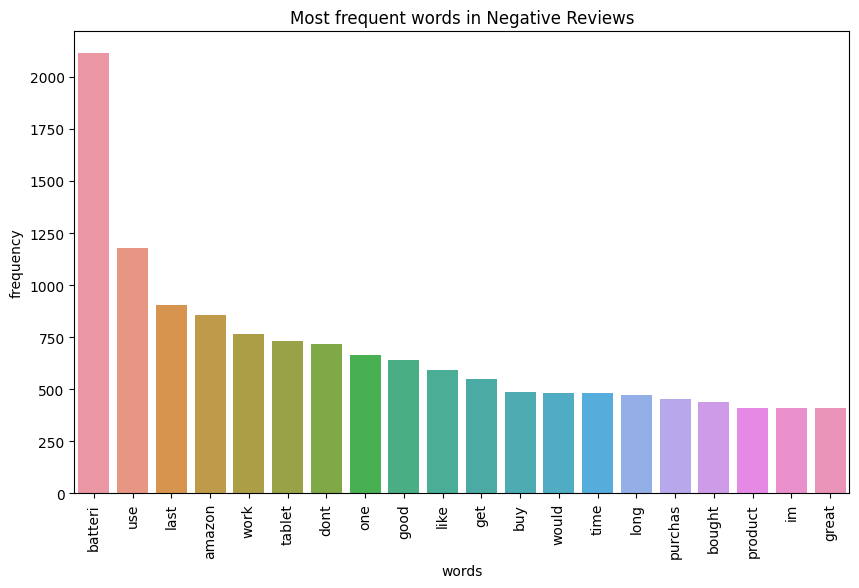

In [48]:
negatives=pd.DataFrame(Counter(word_corpus_low).most_common(20))

plt.figure(figsize=(10,6))
sns.barplot(x=negatives[0], y=negatives[1])
plt.xticks(rotation=90)
plt.xlabel('words')
plt.ylabel('frequency')
plt.title('Most frequent words in Negative Reviews');

Negative reviews mostly focus on word 'battery'. It might suggest that the battery product is the area where Amazon need to look at. It attracted most of the negative reviews.

<h1 style="font-family:verdana; color:#228B22; background-color:#FFFFE0;text-align: center;">VADER (Valence Aware Dictionary and sEntiment Reasoner)</h1>

VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool specifically designed for analyzing sentiments expressed in social media text. It is built on a pre-existing list of lexical features that have been labeled with their corresponding sentiment intensities. The VADER sentiment score calculates the sentiment polarity (positive, negative, or neutral) and the sentiment intensity (how strong the sentiment is) of a given text.

**Advantages of VADER Sentiment Score:**

- Built for Social Media Text: VADER is particularly effective for analyzing sentiments in social media text, such as tweets or online reviews. It handles informal language, slangs, and emoticons commonly used in these platforms.

- Rule-Based Approach: VADER utilizes a rule-based approach, which makes it more interpretable compared to machine learning-based models. The rules are designed to capture linguistic nuances and sentiment intensity.

- Domain Adaptability: VADER is not limited to specific domains or topics. It can be applied to a wide range of domains and does not require domain-specific training data.

- Handles Negation and Capitalization: VADER is capable of understanding the impact of negations and capitalization on sentiment. It considers the context in which words appear, allowing it to handle phrases like "not good" correctly.

**Disadvantages of VADER Sentiment Score:**

- Lexicon Limitations: The sentiment analysis accuracy of VADER heavily relies on the lexicon it is built upon. While VADER's lexicon is extensive, it may not capture all possible variations or new emerging words, leading to potential inaccuracies.

- Contextual Ambiguity: VADER's rule-based approach might struggle with sentences that contain sarcasm, irony, or other forms of ambiguous contexts. These cases may require a deeper understanding of the context to accurately determine sentiment.

- Lack of Granularity: VADER provides sentiment scores as positive, negative, or neutral, but it does not offer fine-grained sentiment labels. It may not distinguish between subtle nuances of sentiment or provide detailed sentiment analysis.

**Helpfulness in Sentiment Analysis:**

VADER's strengths lie in its ability to handle variety of text, adapt to different domains, and consider contextual factors like negations. Its rule-based approach provides transparency and interpretability. Due to these advantages, VADER is a valuable tool for sentiment analysis tasks in social media monitoring, brand reputation analysis, customer feedback analysis, and other applications where quick sentiment insights are required. However, for more nuanced and complex sentiment analysis tasks, machine learning-based approaches may be more appropriate.

In [56]:
#intstantiating SentimentIntensityAnalyzer class
sia=SentimentIntensityAnalyzer()

In [57]:
reviews=reviews.reset_index()

In [58]:
sentiment={}
for index, row in tqdm(reviews.iterrows(), total=len(reviews)):
    text=row['transformed_review']
    id=row['index']

    sentiment[id]=sia.polarity_scores(text)

100%|██████████| 34929/34929 [00:11<00:00, 3171.51it/s]


In [59]:
vader_scores=pd.DataFrame(sentiment).T.reset_index()
vader= reviews.merge(vader_scores, on='index')
vader.head()

,index,id,date,rating,review,title,transformed_review,rating_type,neg,neu,pos,compound
0,0,AVpgNzjwLJeJML43Kpxn,2017-03-02T00:00:00.000Z,3.0,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,order 3 one item bad qualiti miss backup sprin...,low,0.298,0.702,0.000,-0.6249
1,1,AVpgNzjwLJeJML43Kpxn,2016-08-31T00:00:00.000Z,4.0,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,bulk alway less expens way go product like,high,0.000,0.737,0.263,0.3612
2,2,AVpgNzjwLJeJML43Kpxn,2016-12-06T00:00:00.000Z,5.0,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,well duracel price happi,high,0.000,0.588,0.412,0.2732
3,3,AVpgNzjwLJeJML43Kpxn,2016-03-28T00:00:00.000Z,5.0,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,seem work well name brand batteri much better ...,high,0.000,0.583,0.417,0.6124
4,4,AVpgNzjwLJeJML43Kpxn,2017-04-22T00:00:00.000Z,5.0,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,batteri long last price great,high,0.000,0.494,0.506,0.6249


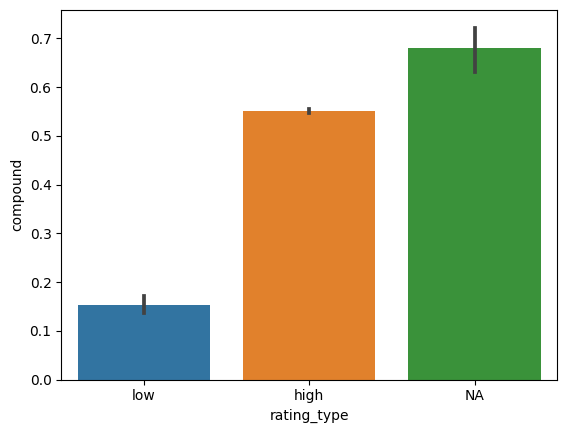

In [60]:
sns.barplot(x='rating_type', y='compound', data=vader);

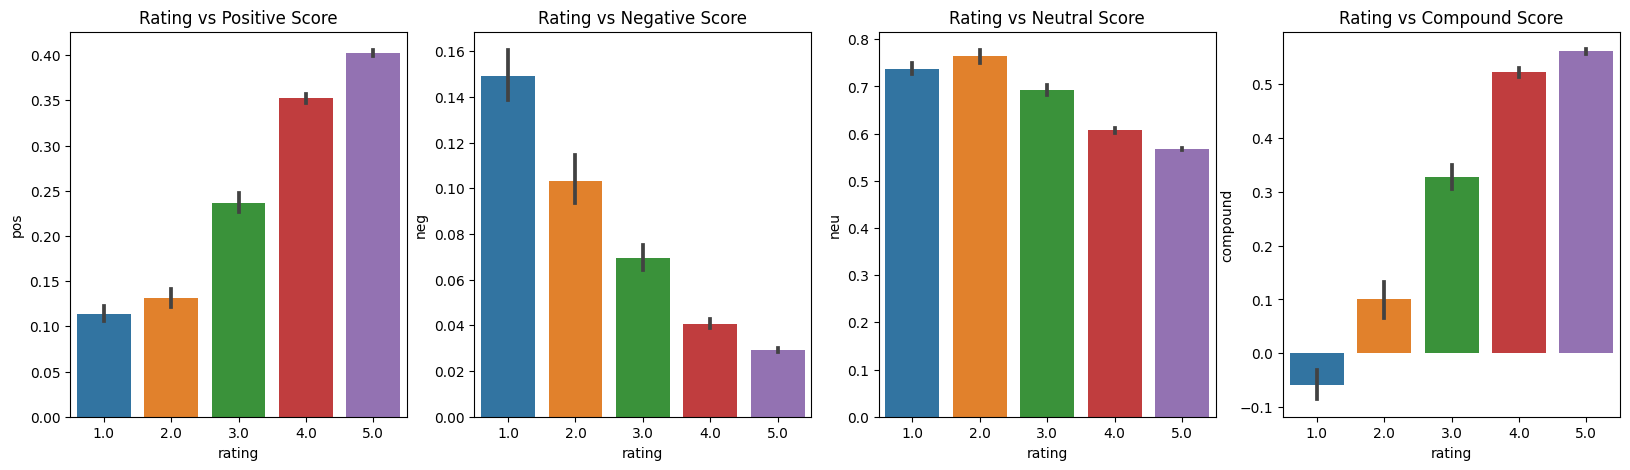

In [61]:
fig, ax=plt.subplots(1,4, figsize=(20,5))

sns.barplot(x='rating', y='pos', data=vader, ax=ax[0])
sns.barplot(x='rating', y='neg', data=vader, ax=ax[1])
sns.barplot(x='rating', y='neu', data=vader, ax=ax[2])
sns.barplot(x='rating', y='compound', data=vader, ax=ax[3])

ax[0].set_title('Rating vs Positive Score')
ax[1].set_title('Rating vs Negative Score')
ax[2].set_title('Rating vs Neutral Score')
ax[3].set_title('Rating vs Compound Score');

<h1 style="font-family:verdana; color:#228B22; background-color:#FFFFE0;text-align: center;">RoBERTa (Robustly Optimized BERT approach)</h1>

RoBERTa (Robustly Optimized BERT approach) is a transformer-based language model that has been pretrained on a large corpus of unlabeled text data. It is similar to the VADER (Valence Aware Dictionary and sEntiment Reasoner) sentiment analysis model in the sense that both are powerful tools used in sentiment analysis tasks.

RoBERTa, based on the BERT (Bidirectional Encoder Representations from Transformers) architecture, excels in understanding the contextual meaning of words and sentences. It captures the relationships and dependencies among words, enabling it to generate more accurate sentiment predictions.

**Advantages of RoBERTa Pretrained Model:**

- Contextual Understanding: RoBERTa has been pretrained on a massive amount of text data, which helps it grasp the nuances of language and context. This contextual understanding enables more accurate sentiment analysis by considering the surrounding words and their meanings.

- Fine-tuning Capabilities: The RoBERTa model can be fine-tuned on specific sentiment analysis tasks using labeled data. This allows it to adapt and specialize its predictions for the particular sentiment classification problem at hand.

- Language-Agnostic: RoBERTa is designed to work effectively across multiple languages, making it suitable for sentiment analysis tasks in diverse linguistic contexts.

- State-of-the-Art Performance: RoBERTa has achieved state-of-the-art performance on various natural language processing (NLP) benchmarks and competitions. Its advanced architecture and training methodology contribute to its impressive accuracy and robustness.

**Disadvantages of RoBERTa Pretrained Model:**

- Computational Resources: Training and fine-tuning RoBERTa models can be computationally intensive and may require substantial computational resources, including high-performance GPUs or TPUs.

- Data Dependency: RoBERTa heavily relies on large amounts of labeled data for fine-tuning, and the quality and representativeness of the training data can significantly impact its performance.

- Interpretability: Transformer-based models like RoBERTa are known to be "black-box" models, meaning they provide accurate predictions but lack interpretability. Understanding the specific reasons behind the sentiment predictions made by RoBERTa can be challenging.

RoBERTa, with its strong contextual understanding and ability to capture intricate linguistic patterns, proves to be a valuable tool for sentiment analysis tasks. Its performance, combined with the ability to fine-tune for specific applications, makes it a popular choice in the field of NLP and sentiment analysis.

In [62]:
# Tasks:
# emoji, emotion, hate, irony, offensive, sentiment

task='sentiment'
MODEL = f"cardiffnlp/twitter-roberta-base-{task}"

In [64]:
tokenizer=AutoTokenizer.from_pretrained(MODEL)
model=AutoModelForSequenceClassification.from_pretrained(MODEL)

In [65]:
def roberta_scores(example):
    encoded_text=tokenizer(example, return_tensors='pt')
    output=model(**encoded_text)
    scores=output[0][0].detach().numpy()
    scores=softmax(scores)
    scores_dict={'roberta_neg': scores[0],
                'roberta_neu': scores[1],
                'roberta_pos': scores[2]}

    return scores_dict

In [66]:
sentiments_roberta={}
for ind, row in tqdm(reviews.iterrows(), total=len(reviews)):
    try:
        text=row['transformed_review']
        id=row['index']
        roberta_result=roberta_scores(text)
        sentiments_roberta[id]=roberta_result
    except RuntimeError:
        print(r'Error in row with {} index'.format(id))

  0%|          | 65/34929 [00:07<1:00:02,  9.68it/s]

Error in row with 63 index


 23%|██▎       | 7904/34929 [12:50<38:03, 11.84it/s]  

Error in row with 7903 index


 24%|██▍       | 8383/34929 [13:41<42:12, 10.48it/s]  

Error in row with 8380 index


 53%|█████▎    | 18414/34929 [30:39<22:09, 12.43it/s]  

Error in row with 18411 index


 95%|█████████▌| 33203/34929 [55:40<04:42,  6.11it/s]  

Error in row with 33203 index


 95%|█████████▌| 33346/34929 [55:56<04:36,  5.72it/s]

Error in row with 33346 index


 96%|█████████▋| 33674/34929 [57:38<04:42,  4.44it/s]

Error in row with 33675 index


 96%|█████████▋| 33683/34929 [57:40<03:34,  5.81it/s]

Error in row with 33681 index


 96%|█████████▋| 33688/34929 [57:40<02:44,  7.54it/s]

Error in row with 33686 index


 97%|█████████▋| 33717/34929 [57:48<04:01,  5.02it/s]

Error in row with 33715 index


 97%|█████████▋| 33719/34929 [57:49<05:22,  3.75it/s]

Error in row with 33719 index


 97%|█████████▋| 33723/34929 [57:50<04:18,  4.67it/s]

Error in row with 33721 index


 97%|█████████▋| 33764/34929 [58:00<04:21,  4.45it/s]

Error in row with 33762 index


 98%|█████████▊| 34120/34929 [59:48<03:04,  4.38it/s]

Error in row with 34118 index


 98%|█████████▊| 34122/34929 [59:49<03:30,  3.84it/s]

Error in row with 34122 index


 98%|█████████▊| 34128/34929 [59:50<02:10,  6.11it/s]

Error in row with 34126 index


 98%|█████████▊| 34182/34929 [1:00:09<05:40,  2.19it/s]

Error in row with 34182 index
Error in row with 34183 index


100%|██████████| 34929/34929 [1:02:18<00:00,  9.34it/s]


In [72]:
roberta=pd.DataFrame(sentiments_roberta).T.reset_index()
roberta.head()

,index,roberta_neg,roberta_neu,roberta_pos
0,0,0.605862,0.366984,0.027155
1,1,0.196356,0.739189,0.064456
2,2,0.162116,0.780371,0.057513
3,3,0.003917,0.080896,0.915188
4,4,0.005769,0.099333,0.894898


In [75]:
roberta=reviews.merge(roberta, on='index')

In [80]:
sentiment_df=roberta.merge(vader[['index', 'neg', 'neu', 'pos', 'compound']], on='index')

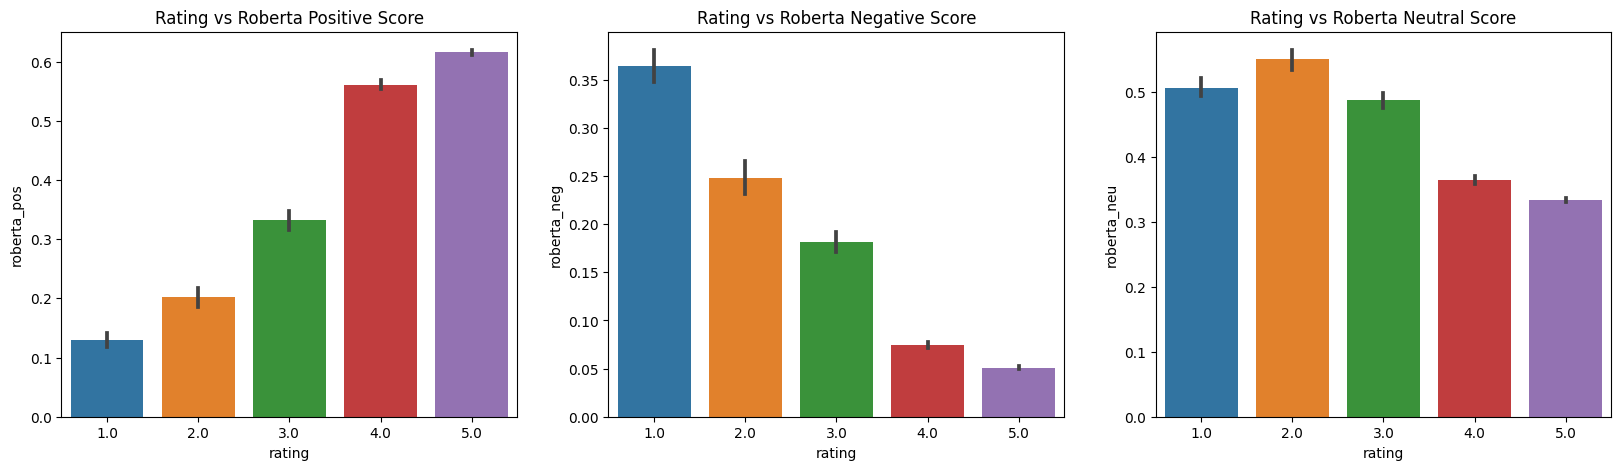

In [83]:
fig, ax=plt.subplots(1,3, figsize=(20,5))

sns.barplot(x='rating', y='roberta_pos', data=sentiment_df, ax=ax[0])
sns.barplot(x='rating', y='roberta_neg', data=sentiment_df, ax=ax[1])
sns.barplot(x='rating', y='roberta_neu', data=sentiment_df, ax=ax[2])

ax[0].set_title('Rating vs Roberta Positive Score')
ax[1].set_title('Rating vs Roberta Negative Score')
ax[2].set_title('Rating vs Roberta Neutral Score');

<h1 style="font-family:verdana; color:#228B22; background-color:#FFFFE0;text-align: center;">Comparing RoBERTa and VADER</h1>

In [161]:
def get_sentiment_scores(review):
    
    #roberta
    encoded_text=tokenizer(review, return_tensors='pt')
    output=model(**encoded_text)
    scores=output[0][0].detach().numpy()
    scores=softmax(scores)
    scores_roberta={'neg': scores[0],
                'neu': scores[1],
                'pos': scores[2]}
    scores_vader=sia.polarity_scores(review)
    del scores_vader['compound']
    
    combined={}
    combined['roberta']=scores_roberta
    combined['vader']=scores_vader
    
    df= pd.DataFrame(combined)
    
    # Set the width of each bar
    bar_width = 0.25

    # Calculate the x-coordinates for each dataset
    x_roberta = np.arange(len(df))
    x_vader = x_roberta + bar_width

    # Create the figure and axis
    fig, ax = plt.subplots()

    # Plot the bars for each dataset
    ax.bar(x_roberta, df['roberta'], width=bar_width, label='Roberta')
    ax.bar(x_vader, df['vader'], width=bar_width, label='Vader')

    # Set the x-axis tick labels
    ax.set_xticks(x_roberta + bar_width / 2)
    ax.set_xticklabels(df.index)
    ax.set_title(review)

    # Add a legend
    ax.legend()

    return fig

In [158]:
#another sample review
example=reviews['transformed_review'][np.random.randint(len(reviews))]
example

'great batteri last long time full power'

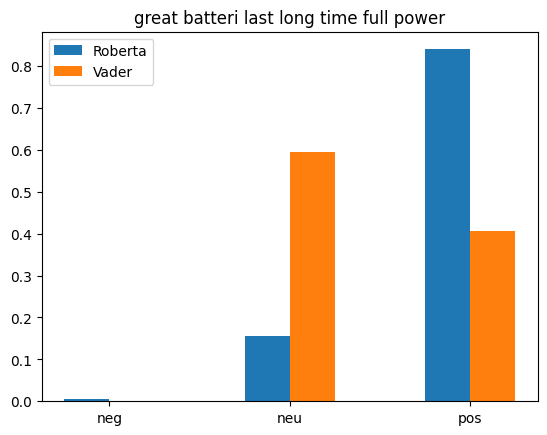

In [163]:
get_sentiment_scores(example);

Based on analysis done on tons of reviews, several differences can be observed. Here is a summary of the comparison:

**Sentiment Differentiation:** The Roberta model shows a better ability to differentiate between positive, negative, and neutral sentiments compared to the Vader model. The Roberta model assigns higher scores to the positive and negative categories, while the Vader model assigns higher scores to the neutral category.

**Valuing Neutrality:** The Vader model tends to value neutrality more for most of the reviews. This is evident from the higher neutral score assigned by the Vader model compared to the Roberta model for the given review.

**Sensitivity to Negativity:** The Roberta model appears to be more sensitive to negative sentiment compared to the Vader model. This is indicated by the higher negative score assigned by the Roberta model for the given review.

**Overall Sentiment Polarity:** The Roberta model assigns a higher positive score and a lower neutral score compared to the Vader model for the given review. This suggests that the Roberta model perceives the review as more positive overall, while the Vader model perceives it as more neutral.

Overall, the comparison highlights that the Roberta model tends to provide more nuanced sentiment analysis by differentiating between positive, negative, and neutral sentiments, while the Vader model leans towards valuing neutrality and may be less sensitive to negativity.

## <h1 style="font-family:verdana; color:#228B22; background-color:#FFFFE0;text-align: center;">Discrepancies</h1>

### Case1: User gave low rating but Model identify Positive sentiment

In [186]:
odd_ones=sentiment_df[sentiment_df['rating']==1].sort_values('roberta_pos', ascending=False)
odd_ones.head(3)

,index,id,date,rating,review,title,transformed_review,rating_type,roberta_neg,roberta_neu,roberta_pos,neg,neu,pos,compound
16793,16798,AVpfw2hvilAPnD_xh0rH,2017-06-12T00:00:00.000Z,1.0,She uses it every day. She can't get enough of...,My granddaughter loves it!,use everi day cant get enough,low,0.022662,0.073970,0.903369,0.0,1.000,0.000,0.0000
5898,5899,AVpgNzjwLJeJML43Kpxn,2017-08-08T00:00:00.000Z,1.0,Out of every package so far only 2 batteries a...,I bought these in April so they should still a...,everi packag far 2 batteri work bought april s...,low,0.007239,0.107799,0.884962,0.0,0.741,0.259,0.6808
21649,21656,AVqkIdZiv8e3D1O-leaJ,2016-10-21T00:00:00.000Z,1.0,Gave it to my granddaughter and she loves it.....,The tablet I bought was a 3th birthday gift..,gave granddaught love iti want buy one,low,0.007809,0.107798,0.884393,0.0,0.476,0.524,0.6705


She uses it every day. She can't get enough of it.


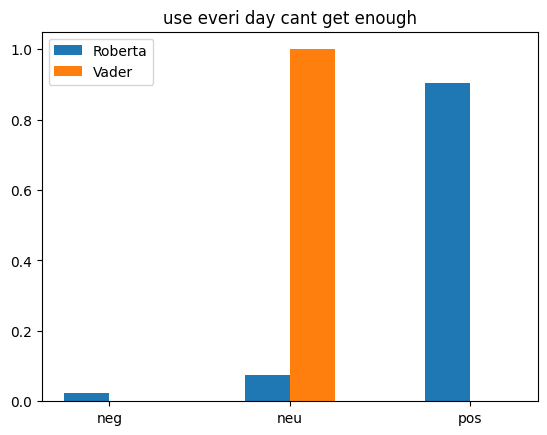

In [187]:
index=0
print(odd_ones['review'].values[index])
get_sentiment_scores(odd_ones['transformed_review'].values[index]);


Review seems positive. but user gave it low rating. Roberta manage to get the correct sentiment from the review. Notice that Vader say that the reviews is more of neutral sentiment which is wrong 

Out of every package so far only 2 batteries are working. I bought these in April so they should still all be good and I'm finding I need to throw most of them away. I wish I could still return them.


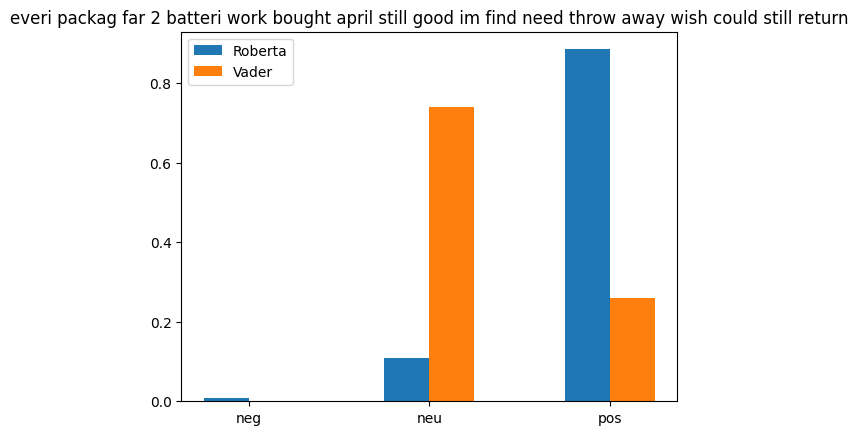

In [188]:
index=1
print(odd_ones['review'].values[index])
get_sentiment_scores(odd_ones['transformed_review'].values[index]);

This review tends more on negative side. But both Roberta and Vader say that it is either neutral or positive. It could be because of the absense of an negative words and presence of words such as 'working', 'good', 'still'.

Gave it to my granddaughter and she loves it..I want to buy one for myself....


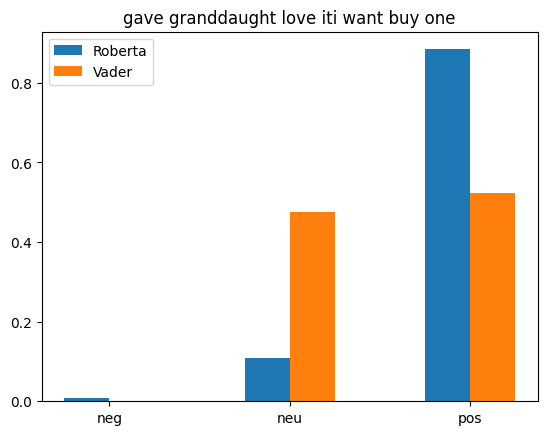

In [189]:
index=2
print(odd_ones['review'].values[index])
get_sentiment_scores(odd_ones['transformed_review'].values[index]);

This looks fine. The user wrote a positve review but gave 1 rating. The review conveys a strong positive sentiment which is correctly captured by Roberta. Vader again seems confused between neutral and positive sentiments

### Case2: User gave high rating but Model identify negative sentiment

In [191]:
odd_ones1=sentiment_df[sentiment_df['rating']==5].sort_values('roberta_neg', ascending=False)
odd_ones1.head(3)

,index,id,date,rating,review,title,transformed_review,rating_type,roberta_neg,roberta_neu,roberta_pos,neg,neu,pos,compound
1379,1380,AVpgNzjwLJeJML43Kpxn,2016-05-18T00:00:00.000Z,5.0,awesome price awesome product cannot go wrong.,Five Stars,awesom price awesom product go wrong,high,0.932863,0.063776,0.003361,0.383,0.617,0.000,-0.4767
2336,2337,AVpgNzjwLJeJML43Kpxn,2016-10-20T00:00:00.000Z,5.0,great for battery sucking xbox one controllers,Five Stars,great batteri suck xbox one control,high,0.917285,0.073161,0.009554,0.264,0.364,0.373,0.2960
7541,7542,AVpgNzjwLJeJML43Kpxn,2016-09-20T00:00:00.000Z,5.0,I've never actually paid attention to how long...,They work!,ive never actual paid attent long batteri last...,high,0.911383,0.082838,0.005779,0.000,1.000,0.000,0.0000


awesome price awesome product cannot go wrong.


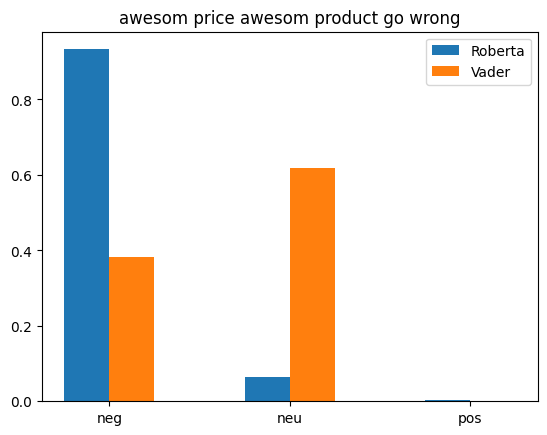

In [192]:
index=0
print(odd_ones1['review'].values[index])
get_sentiment_scores(odd_ones1['transformed_review'].values[index]);

The review has strong postive sentiment. It seems that, both models fail to detect it because of the usage of word 'wrong' in positve context. This is an example of instances where Roberta model unable to capture the context with play of words. As usual, Vader is sticking with Neutral Sentiments

great for battery sucking xbox one controllers


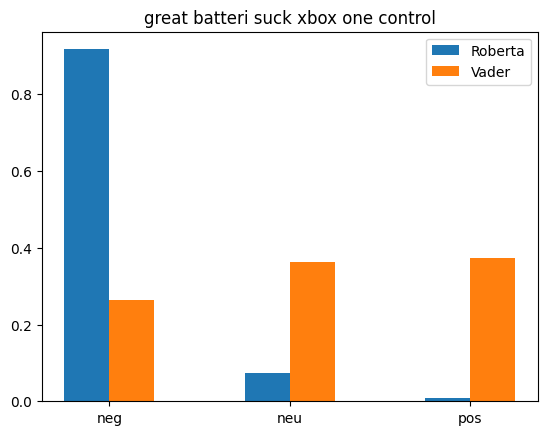

In [193]:
index=1
print(odd_ones1['review'].values[index])
get_sentiment_scores(odd_ones1['transformed_review'].values[index]);

The user wanted to say that the product is great for xbox which has very positive sentiment. However, Roberta model seems to have got infuenced by the word 'sucking' which was used as an adjective for xbox controller. 

I've never actually paid attention to how long batteries last in anything. Still don't. These are working though!


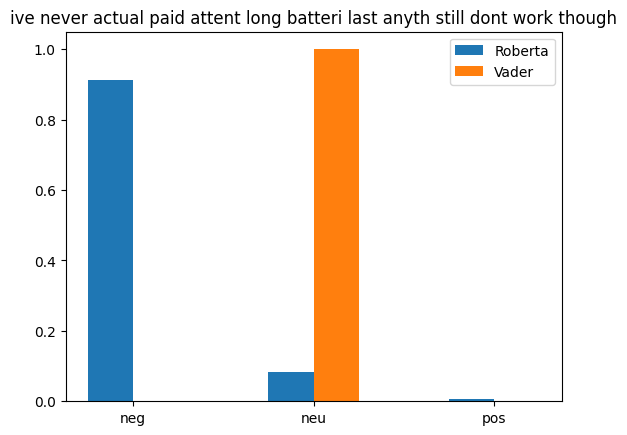

In [194]:
index=2
print(odd_ones1['review'].values[index])
get_sentiment_scores(odd_ones1['transformed_review'].values[index]);

In this instance, Vader model delivered correct output. The review sounds like the user do not bother much about performance. Roberta models classify it as negative sentiment. This could be because of words such as 'never' and 'don't'.

With all of these example, we can say that, while the Roberta model offers improved sentiment analysis capabilities compared to the Vader model, it is essential to acknowledge its limitations. Here are some limitations of the Roberta model:

**Language Dependency:** The Roberta model's performance can vary depending on the language it is trained on. If the model is trained on a specific language, it may not generalize well to other languages. Therefore, its effectiveness in sentiment analysis tasks may be limited to the languages it was trained on.

**Data Bias:** The performance of the Roberta model is influenced by the training data it receives. If the training data contains biases, such as underrepresentation or overrepresentation of certain demographics or perspectives, the model may inherit those biases. This can result in biased sentiment analysis outputs, affecting the reliability and fairness of the model.

**Contextual Understanding:** While the Roberta model has a strong understanding of contextual language, it may still struggle with certain nuances, sarcasm, or context-specific sentiments. These limitations stem from the complexities of language comprehension, and the model may not always capture the intended sentiment accurately in such cases.

**Interpretability:** Like many deep learning models, the Roberta model's internal workings and decision-making process can be challenging to interpret. It can be challenging to understand how the model arrives at its sentiment analysis outputs, making it difficult to explain its predictions or identify potential biases or errors.

While it offers advancements over traditional models like Vader, it is crucial to assess RoBERTa's performance within specific contexts, validate its outputs, and consider potential biases and limitations when interpreting the results.

<h1 style="font-family:verdana; color:#228B22; background-color:#FFFFE0;text-align: center;">Overall Sentiments Analysis from the Dataset</h1>

To calculate the overall sentiment of a dataset based on the Roberta scores, we will:

- Take the average ofthe sentiment scores for each sentiment category (negative, neutral, positive) across all the data points.
- Determine the sentiment with the highest average value as the overall sentiment of the dataset.

In [251]:
roberta.head(2)

,index,id,date,rating,review,title,transformed_review,rating_type,roberta_neg,roberta_neu,roberta_pos
0,0,AVpgNzjwLJeJML43Kpxn,2017-03-02T00:00:00.000Z,3.0,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,order 3 one item bad qualiti miss backup sprin...,low,0.605862,0.366984,0.027155
1,1,AVpgNzjwLJeJML43Kpxn,2016-08-31T00:00:00.000Z,4.0,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,bulk alway less expens way go product like,high,0.196356,0.739189,0.064456


In [244]:
new_rob=roberta[['roberta_neg', 'roberta_neu', 'roberta_pos']]

In [246]:
# Summing up the sentiment scores
overall_sentiment = new_rob.mean(axis=0).idxmax()

print("Overall Sentiment:", overall_sentiment)

Overall Sentiment: roberta_pos


**That's great to see! Based on the average sentiment scores, the overall sentiment of dataset is determined to be positive according to the Roberta model. This means that, on average, the reviews or texts in your dataset are predominantly expressing positive sentiment.**

<h1 style="font-family:verdana; color:#228B22; background-color:#FFFFE0;text-align: center;">Summary</h1>

In this project, the goal was to perform sentiment analysis on a amazon product review dataset using two different models: Roberta and Vader. The dataset consisted of reviews or text samples for which sentiment analysis was to be conducted. The objective was to compare the performance and characteristics of the Roberta and Vader models in determining the sentiment of the given text.

Initially, the dataset was preprocessed by applying necessary text cleaning techniques such as removing stopwords, tokenizing the text, and performing any required normalization or stemming. This ensured that the text data was in a suitable format for sentiment analysis.

The first model used for sentiment analysis was Vader (Valence Aware Dictionary and sEntiment Reasoner). Vader is a rule-based model that assigns sentiment scores to individual words and combines them to generate an overall sentiment score for a given text. The Vader model provided sentiment scores in three categories: negative, neutral, and positive, along with a compound score representing the overall sentiment.

The second model used for sentiment analysis was Roberta (Robustly Optimized BERT Pretraining Approach). Roberta is a pre-trained transformer-based model that is fine-tuned for various natural language processing tasks, including sentiment analysis. The Roberta model provided sentiment scores in the same three categories: negative, neutral, and positive.

Overall, the project showcased the advantages of using a transformer-based model like Roberta over a rule-based model like Vader for sentiment analysis tasks. The Roberta model demonstrated better performance in distinguishing between positive, negative, and neutral sentiment and provided more detailed sentiment scores. However, it should be noted that the Roberta model is computationally more expensive (it took more than an hour to get the output)and requires more resources compared to the rule-based approach of the Vader model.

**Key findings:**
- The reviews had an average length of approximately 108 characters, 22 words, and 1.5 sentences
- The reviews with high ratings tend to have shorter lengths in terms of characters, words, and sentences compared to reviews with low ratings. This suggests that customers may express their satisfaction more concisely in positive reviews, whereas negative reviews may involve more detailed explanations or grievances.
- The average rating of the reviews was found to be around 4.2, indicating that the majority of the reviews were positive. This was later validated by RoBERa model.

Overall, this project successfully explored amazon reviews and captured the overall sentiment of customers using Roberta and Vader models, providing valuable insights into their strengths and limitations.

<h1 style="color:tomato; font-family: 'Helvetica Neue', sans-serif; font-size:30px; text-align: center; font-weight:bold; font-style:italic">THANK YOU</h1>